<a href="https://colab.research.google.com/github/udayatom/DeepLearning/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Part 1 - Data Preprocessing

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing Dataset

In [6]:
#https://github.com/sharmaroshan/Churn-Modelling-Dataset/blob/master/Churn_Modelling.csv
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/Churn_Modelling.csv')
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

#Creating dummy variables

In [9]:
#Geography and Gender are the categorical feature,
geography = pd.get_dummies(X["Geography"],drop_first=True)
gender =pd.get_dummies(X["Gender"],drop_first=True)

#Concatinating the Dataframes

In [10]:
X = pd.concat([X,geography,gender],axis=1)

#Drop Unnecessary columns

In [13]:
X=X.drop(['Geography','Gender'],axis =1)

#Splitting Dataset into Train set & Test set

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
X_train.shape

(8000, 11)

In [18]:
Y_train.shape

(8000,)

#Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc = StandardScaler()

In [23]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [26]:
X_train.shape

(8000, 11)

## Part 2 - Creating ANN

In [32]:
#importing libraries
import keras
from keras.models import Sequential# Responsible for creating the Neural Network, In ANN, CNN, RNN
from keras.layers import Dense#Responsible for creating the hidden layer
#from keras.layers import LeakyReLU,PReLU, ELU
from keras.layers import Dropout

In [38]:
#Initializing the ANN
classifier = Sequential() # Empty neural network

#Adding the input layer and hidden layer

In [39]:

classifier.add(Dense(units=6, kernel_initializer='he_uniform',activation='relu',input_dim=11))
# Hidden layer neuron size
# Weight initialization techinque is mentioned in kernel_initializer param(he_uniform is good relu)
# Activate function
# Input feature data size

#Adding the second hidden layer

In [41]:
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

#Adding the output layer

In [42]:
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

#NN Summary

In [44]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6)                 72        
                                                                 
 dense_3 (Dense)             (None, 6)                 42        
                                                                 
 dense_4 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Compiling the ANN

In [45]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#Fitting the ANN to the Training set

In [49]:
model_history = classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3316 - accuracy: 0.8643 - val_loss: 0.3522 - val_accuracy: 0.8565
Epoch 2/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3319 - accuracy: 0.8645 - val_loss: 0.3518 - val_accuracy: 0.8569
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3306 - accuracy: 0.8634 - val_loss: 0.3543 - val_accuracy: 0.8561
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3311 - accuracy: 0.8642 - val_loss: 0.3523 - val_accuracy: 0.8580
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3315 - accuracy: 0.8658 - val_loss: 0.3537 - val_accuracy: 0.8557
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3312 - accuracy: 0.8640 - val_loss: 0.3511 - val_accuracy: 0.8573
Epoch 7/100
536/536 [==============================] - 4s 7ms/step - loss: 0.3312 - accuracy: 0.8651 - val_loss: 0.3529 - val_accuracy: 0.8550

#List all data in history

In [54]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


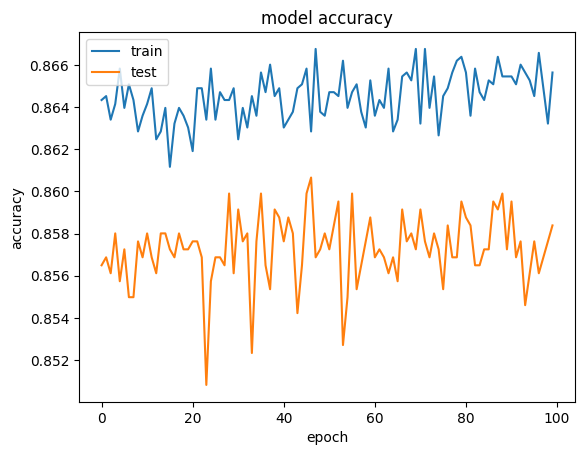

In [56]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

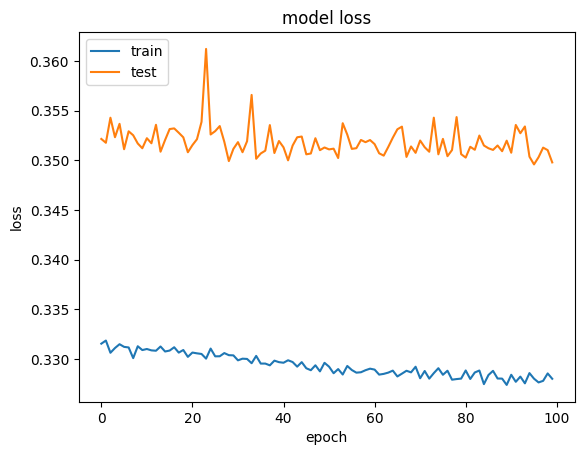

In [57]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model


In [59]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [60]:
y_pred = (y_pred > 0.5)

In [66]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [67]:
cm

array([[605, 990],
       [100, 305]])

In [64]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,Y_test)

In [65]:
score

0.455